In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals, division

import IPython
import warnings
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import HTML
from IPython.display import display as prnt

import sys
reload(sys)
sys.setdefaultencoding("utf-8")

# Notebook Options
%matplotlib inline
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {
'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

# Colors // Categorical
cm = [
'#9c27b0',
'#8bc34a',
'#ffeb3b',
'#ffc107',
'#e91e63',
'#ff5722',
'#3f51b5',
'#607d8b',
'#03a9f4',
'#9e9e9e',
]

cm = ['#f44336',
'#e91e63',
'#9c27b0',
'#673ab7',
'#3f51b5',
'#2196f3',
'#00bcd4',
'#009688',
'#4caf50',
'#ffeb3b',
'#ffc107',
'#ff5722']

cm = ['#e53935',
'#d81b60',
'#3949ab',
'#00897b',
'#00acc1',
'#1d486d',
'#43a047',
'#fdd835',
'#ffb300',
'#f9a78d']

# cm = [
#     '#e23e2c',
#     '#e9e396',
#     '#4b71a7',
#     '#4aaa5d',
#     '#e23e2c',
#     '#e9e396',
#     '#4b71a7',
#     '#4aaa5d',
#     '#e23e2c',
#     '#e9e396',
#     '#4b71a7',
#     '#4aaa5d'
# ]

# Utility Functions
def table(df, replace_match="",replace_str="", print_index=True, print_header=True):
    return IPython.display.display(HTML(df.to_html(index=print_index, header=print_header).replace('<table border="1" class="dataframe">','<table class="table table-striped table-hover">').replace(replace_match,replace_str)))

# HTML Functions
h1 = lambda x : prnt(HTML('''<h1 style="text-align:center">'''+ x +'''</h1>'''))
h2 = lambda x: prnt(HTML('''<h2 style="text-align:center">'''+ x +'''</h2>'''))
h2_success = lambda x: prnt(HTML('''<h2 style="text-align:center" class="alert alert-success">'''+ x +'''</h2>'''))

h3_danger = lambda x: prnt(HTML('''<h3 style="text-align:center" class="alert alert-danger">'''+ x +'''</h3>'''))
h3_info = lambda x: prnt(HTML('''<h3 style="text-align:center" class="alert alert-info">'''+ x +'''</h3>'''))
h3_warning = lambda x: prnt(HTML('''<h3 style="text-align:center" class="alert alert-warning">'''+ x +'''</h3>'''))

h3 = lambda x : prnt(HTML('''<h3 style="text-align:center">'''+ x +'''</h3>'''))
p  = lambda x : prnt(HTML('''<p class="text_cell_render">'''+ x +'''</p>'''))

md_wrap = lambda s, m, e: reduce(lambda x, y: x + "".join(y), zip(s.split(m), ['<'+e+'>','</'+e+'>'] * int(len(s)/2)), "")[:-3] if (m in s) else s
md_b = lambda s : md_wrap(s,'**','b')
md_i = lambda s :  md_wrap(s,'_','i')

md = lambda s : md_i(md_b(s))

def ul(lis):
    lis = ['''<div class="panel panel-default"><div class="panel-body">''' + md(li) + '''</div></div>''' for li in lis]
    prnt(HTML("".join(lis)))
    
# Client Data
org_name = 'Tin Shui Wai Network'
org_code = 'TSWN'
org_uri = '../data/' + org_code + '/' + org_code
org_data = org_uri + '.csv'
org_i18n = org_uri + '.i18n.csv'
org_map = org_uri + '.map.csv'
org_units = org_uri + '.units.csv'
org_lang = 'zh' # 'en' or 'zh'

In [2]:
h1('FOOD CONNECT | REPORT')

In [2]:
h2(org_name)

In [3]:
HTML('''<script>

code_show=true;

function code_toggle() {
    if (code_show){ 
        $('div.input').hide();
        $('.output_scroll').removeClass('output_scroll');
        $('.prompt').hide();
    } else {
        $('div.input').show();
        $('.output_scroll').removeClass('output_scroll');
        $('.prompt').show();
    }
    code_show = !code_show
}
</script>
 
<a class='btn btn-warning btn-lg' style="margin:0 auto; display:block; max-width:320px" href="javascript:code_toggle()">TOGGLE CODE</a>''')

In [20]:
# Data Processing
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(org_data, encoding='utf-8', parse_dates=[2], date_parser=dateparse)  \
        .fillna(0) \
        .set_index(['organisation_id','programme','donor','datetime'])


# Internationalisation
i18n = pd.read_csv(org_i18n, encoding='utf-8')

def is_data_in_lang(df, lang='zh'):
    if df.columns[0] in i18n[lang.upper()].values:
        return True
    else:
        return False

# if org_lang == 'en' and is_data_in_lang(df, 'zh'):
#     df.columns = [i18n.loc[i18n['ZH'] == feat]['EN'].values[0] for feat in df.columns]
# elif org_lang == 'zh' and is_data_in_lang(df, 'en'):
#     df.columns = [i18n.loc[i18n['EN'] == feat]['ZH'].values[0] for feat in df.columns]

# Units
df_units = pd.read_csv(org_units, encoding='utf-8')

# Category Mapping

# # TODO : COLOUR CODE CATEGORIES - FRESH vs PACKAGES

# #      : Categorial legend

# #      : Float 'Other' Category to the righr.

df_map = pd.read_csv(org_map, encoding='utf-8')

dfg = pd.DataFrame()
for category in df_map.canonical.unique():
    dfg[category] = df[df_map[df_map.canonical == category].category.values].sum(axis=1)
    
# Timeseries 
ts = df.index.get_level_values('datetime')

# Yearly Data
df_ts_y = dfg.reset_index().groupby(pd.Grouper(freq='1A',key='datetime')).sum()

# Monthly Data
df_ts_m = dfg.reset_index().groupby(pd.Grouper(freq='1M',key='datetime')).sum()

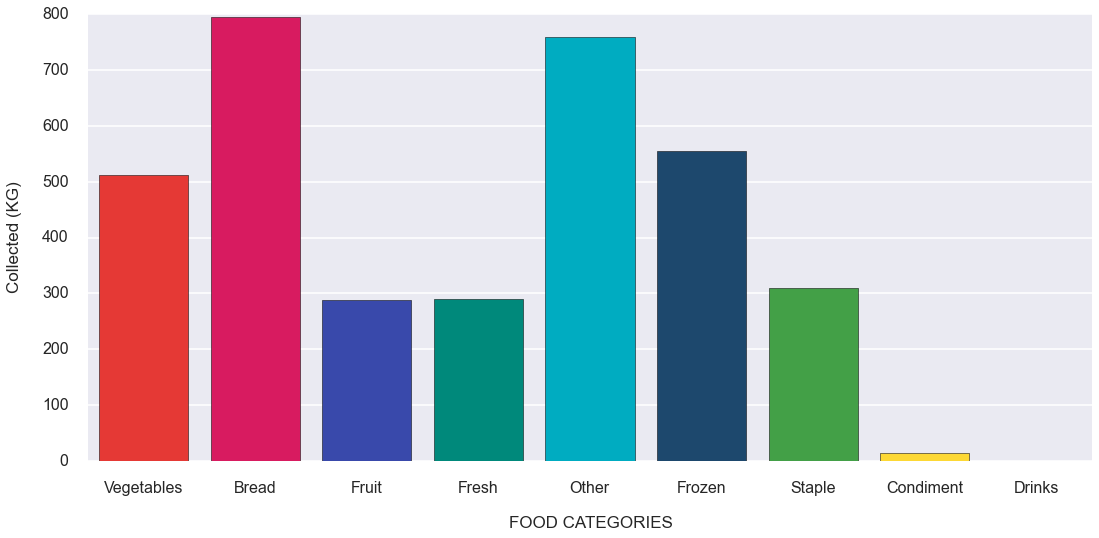

In [70]:
month_offset = 1 - int(any([ts.max().is_month_end, ts.max() > pd.to_datetime('2014-12-23')]))

# Override Month 
# month_offset = 8

month_max = df_ts_m.ix[-(1 + month_offset),:].name.strftime("%B")

h2_success('Latest Results : %s' % month_max)
h3_info('Collected Food by Grouping')

latest_month = df_ts_m.ix[-(1 + month_offset),:]
prev_month = df_ts_m.ix[-(2 + month_offset),:]

x = pd.Index([x.replace(' (kg)','') for x in latest_month.index.values])
y = latest_month.values

with sns.plotting_context("poster", font_scale=1, rc=c):
    # sns.heatmap(flights, annot=True, fmt="d")
    plt.xlabel = 'xlabel'
    f, (ax) = plt.subplots()
    sns.barplot(x, y, palette=cm, x_order=x, ax=ax);
    ax.set_xlabel('FOOD CATEGORIES', labelpad=20)
    ax.set_ylabel('Collected (KG)', labelpad=20)

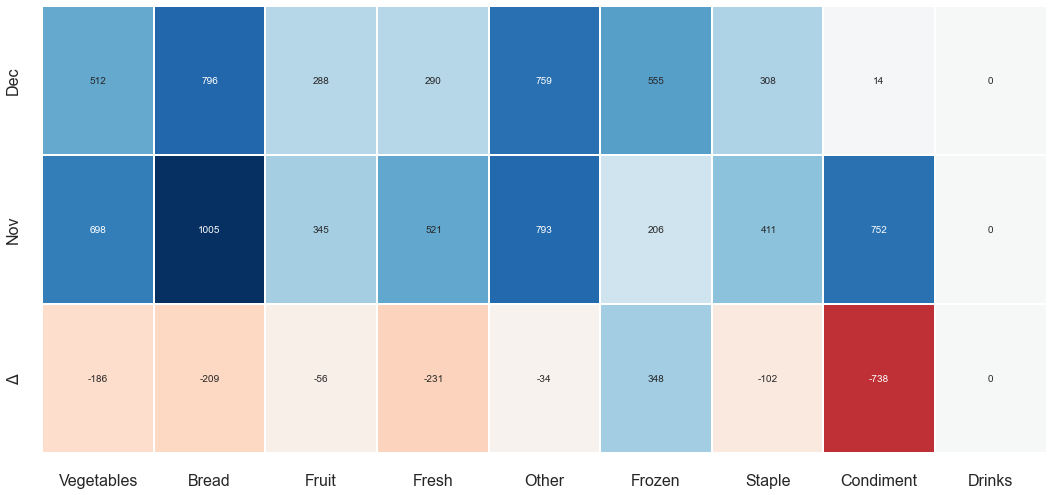

In [71]:
h3_info('Month on Month Performance (Absolute)')

diff_month = latest_month - prev_month
delta_month = pd.concat([latest_month, prev_month, diff_month], axis=1).astype('int')

l = ts.max().strftime('%b')
p = (ts.max() - pd.DateOffset(months=1)).strftime('%b')
d = 'Δ'

delta_month.columns = [l,p,d]
    
with sns.plotting_context("poster", font_scale=1, rc=c):
    sns.heatmap(delta_month.T, annot=True, fmt="d", cmap='RdBu', cbar=False);
#     plt.xlabel = 'xlabel'
#     f, (ax) = plt.subplots()
#     sns.barplot(x, y, palette='PuBu', x_order=x, ax=ax);
#     ax.set_xlabel('FOOD CATEGORIES', labelpad=20)
#     ax.set_ylabel('Collected (KG)', labelpad=20)

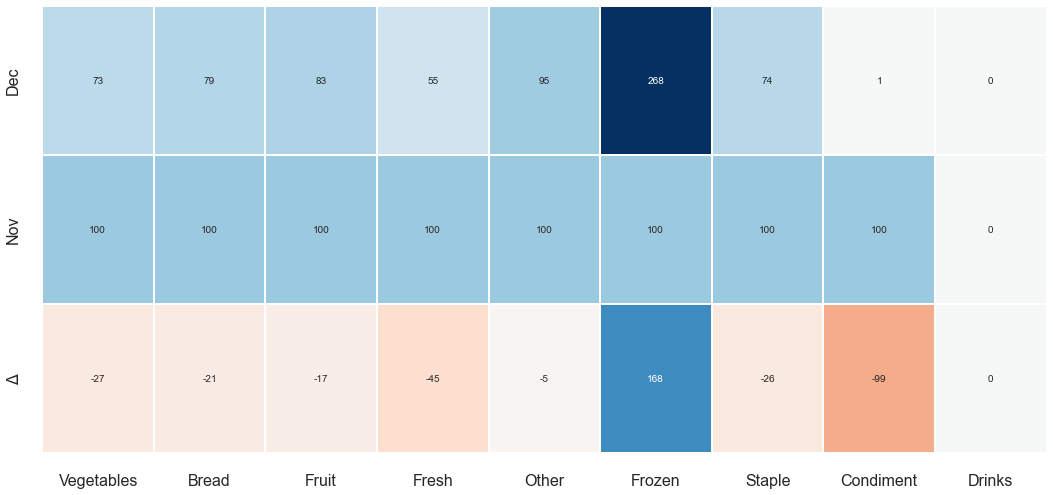

In [72]:
h3_info('Month on Month Performance (Relative)')

n1 = (latest_month / prev_month * 100).fillna(0).astype('int')
n2 = (prev_month/prev_month * 100).fillna(0).astype('int')
n3 = n1 - n2
idx_month = pd.concat([n1,n2,n3],axis=1)
idx_month.columns = [l,p,d]

with sns.plotting_context("poster", font_scale=1, rc=c):
    sns.heatmap(idx_month.T, annot=True, fmt="d", cmap='RdBu', cbar=False);
#     plt.xlabel = 'xlabel'
#     f, (ax) = plt.subplots()
#     sns.barplot(x, y, palette='PuBu', x_order=x, ax=ax);
#     ax.set_xlabel('FOOD CATEGORIES', labelpad=20)
#     ax.set_ylabel('Collected (KG)', labelpad=20)

In [73]:
year_max = ts.max().strftime("%Y")

# Override Year 
# year_max = 2014

h2_success("Current Year : %s" % year_max)

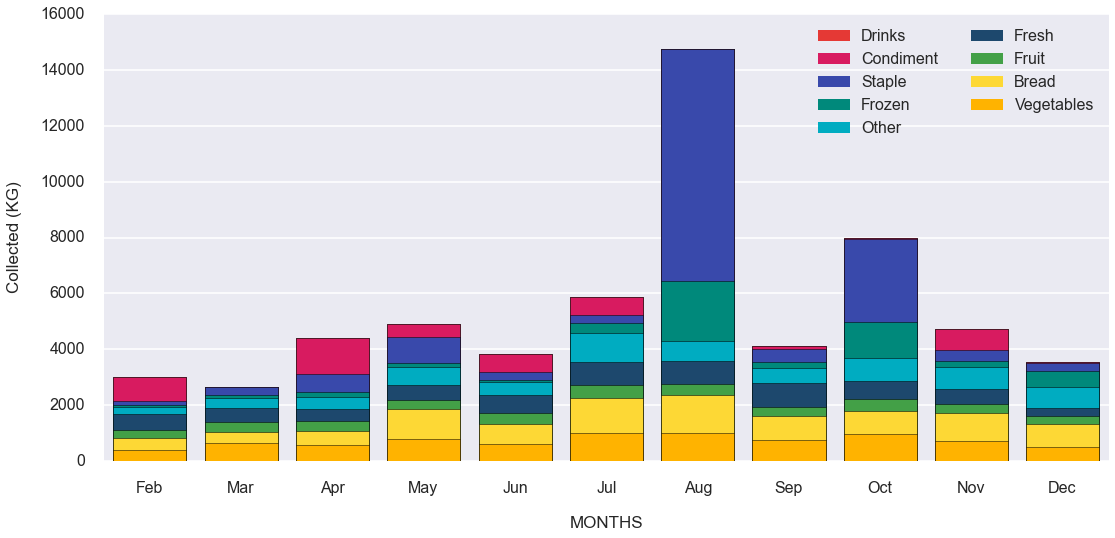

In [78]:
h3_info('Monthly Breakdown')

cy = str(int(datetime.now().strftime('%Y')))
# Override Year
cy =' 2014'
current_year = dfg.reset_index().ix[:,3:].set_index('datetime').ix[cy,:]

cy_gby_m = df_ts_m.ix[cy]
month_names = [x.strftime('%b') for x in pd.to_datetime(cy_gby_m.index)]
months_index = pd.Index([int(x.strftime('%m')) for x in pd.to_datetime(cy_gby_m.index)])

handles = []
stacked_bar_data = cy_gby_m.cumsum(axis=1)
with sns.plotting_context("poster", font_scale=1, rc=c):
    f, (ax) = plt.subplots()
    for idx, category in enumerate(stacked_bar_data.columns.values[::-1]):
        print category
        sns.barplot(x = months_index, y = stacked_bar_data[category], color = cm[idx]).set_ylabel('')
        handles.append(plt.Rectangle((0,0),1,1,fc=cm[idx], edgecolor = 'none'))
        ax.set_xlabel('MONTHS', labelpad=20)
        ax.set_ylabel('Collected (KG)', labelpad=20)
        ax.set_xticklabels(month_names)
        
l = plt.legend(handles, list(stacked_bar_data.columns.values[::-1]), loc=1, ncol = 2, prop={'size':16})

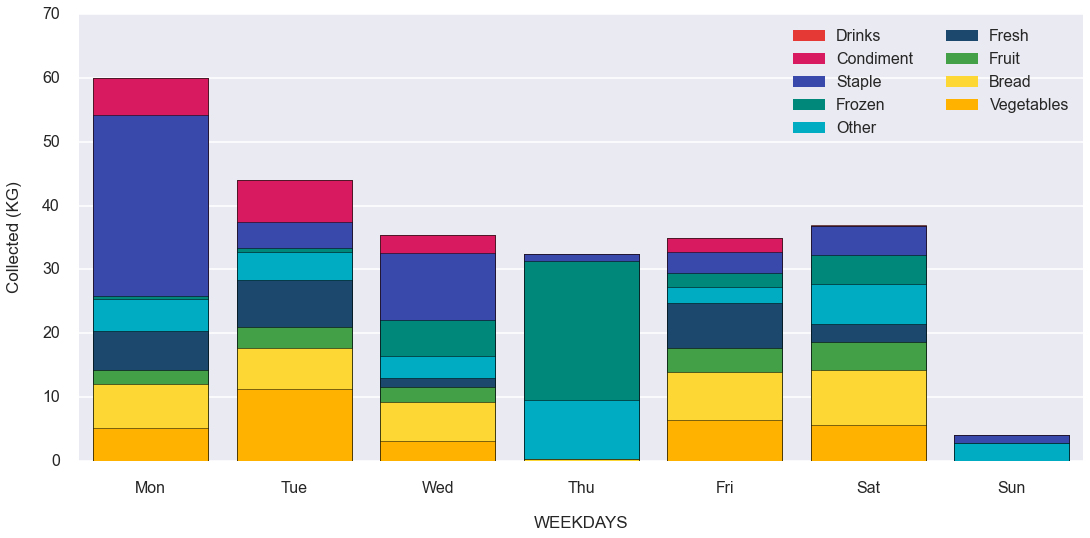

In [80]:
h3_info('Weekly Pattern (Average)')

current_year['wkday'] = current_year.reset_index().datetime.dt.weekday.values
wkday_grouped = current_year.groupby('wkday')
weekly_mean = wkday_grouped.mean()
weekly_median = wkday_grouped.median()
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

handles = []
stacked_bar_data = weekly_mean.cumsum(axis=1)
with sns.plotting_context("poster", font_scale=1, rc=c):
    f, (ax) = plt.subplots()
    for idx, category in enumerate(stacked_bar_data.columns.values[::-1]):
        sns.barplot(x = weekly_mean.index, y = stacked_bar_data[category], color = cm[idx]).set_ylabel('')
        handles.append(plt.Rectangle((0,0),1,1,fc=cm[idx], edgecolor = 'none'))
        ax.set_xlabel('WEEKDAYS', labelpad=20)
        ax.set_ylabel('Collected (KG)', labelpad=20)
        ax.set_xticklabels(weekdays)
        
l = plt.legend(handles, list(stacked_bar_data.columns.values[::-1]), loc=1, ncol = 2, prop={'size':16})

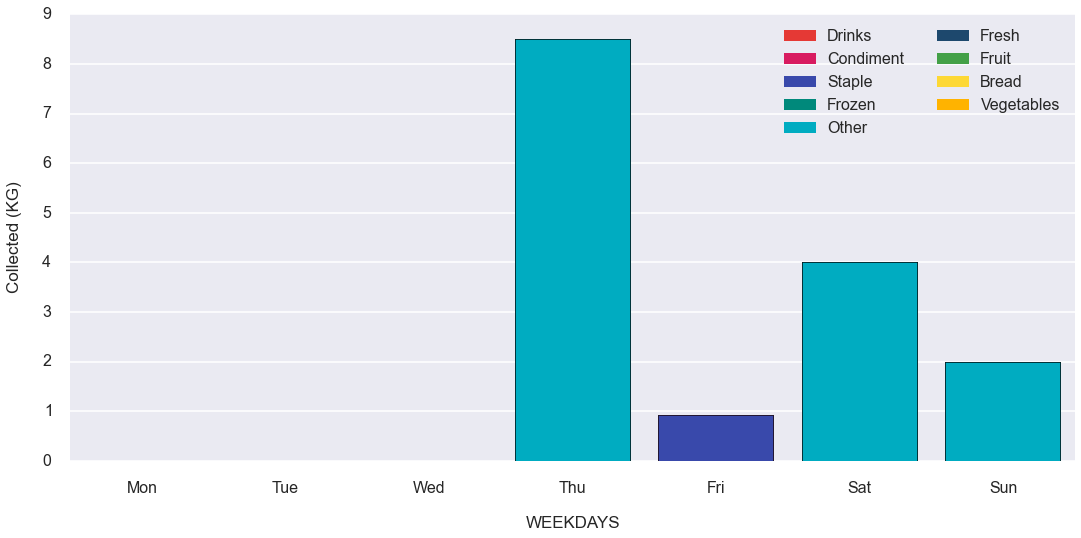

In [81]:
h3_info('Weekly Pattern (Expected)')

handles = []
stacked_bar_data = weekly_median.cumsum(axis=1)
with sns.plotting_context("poster", font_scale=1, rc=c):
    f, (ax) = plt.subplots()
    for idx, category in enumerate(stacked_bar_data.columns.values[::-1]):
        sns.barplot(x = weekly_median.index, y = stacked_bar_data[category], color = cm[idx]).set_ylabel('')
        handles.append(plt.Rectangle((0,0),1,1,fc=cm[idx], edgecolor = 'none'))
        ax.set_xlabel('WEEKDAYS', labelpad=20)
        ax.set_ylabel('Collected (KG)', labelpad=20)
        ax.set_xticklabels(weekdays)
        
l = plt.legend(handles, list(stacked_bar_data.columns.values[::-1]), loc=1, ncol = 2, prop={'size':16})

In [82]:
year_min = ts.min().strftime("%Y")
h2_success("Historic : %s - %s" % (year_min, year_max))

In [83]:
h3_info('Top 5 Stories')
df_unstack = df.T.unstack()
df_unstack.sort(ascending=False)
vimx = pd.DataFrame(df_unstack[:5]).reset_index().ix[:,3:]
vimx.columns = ['When','What','How Much']
table(vimx, print_header=True, print_index=False)

When,What,How Much
2014-08-25,肉,8000
2014-10-22,鴻福堂,2355
2014-08-07,乾糧,2000
2014-04-14,飲品,980
2014-02-24,飲品,840


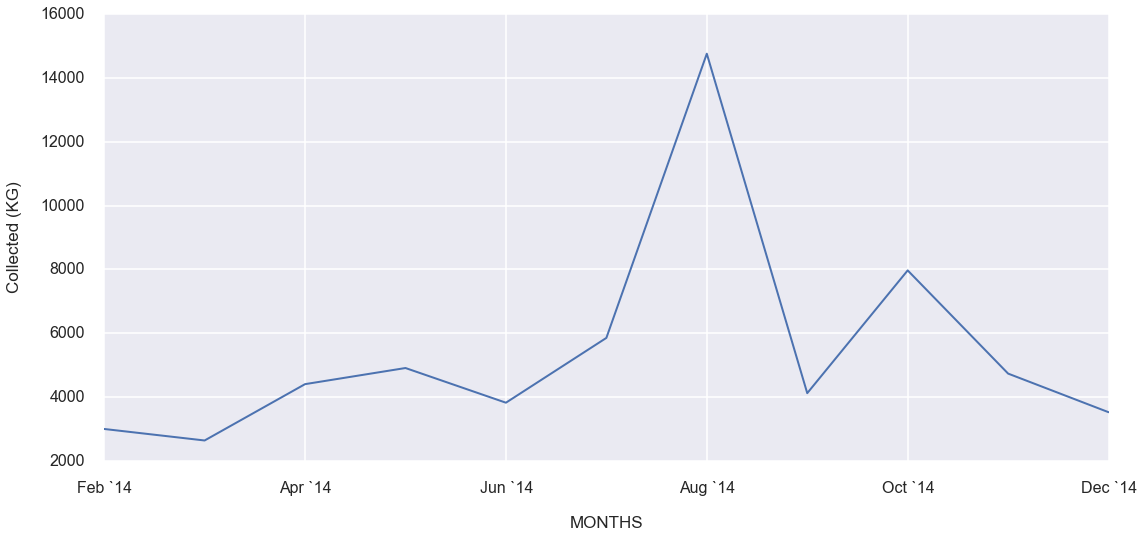

In [84]:
h3_info('Monthly Food Recovery')

xticks = tuple([dt.strftime('%b `%y') for idx, dt in enumerate(df_ts_m.index) if not idx % 2])

with sns.plotting_context("poster", font_scale=1, rc=c):
    f, (ax) = plt.subplots()
    plt.plot(df_ts_m.sum(axis=1))
    ax.set_xticklabels(xticks)
    ax.set_xlabel('MONTHS', labelpad=20)
    ax.set_ylabel('Collected (KG)', labelpad=20)


In [86]:
# h3_info('Yearly Performance (Current)')

# handles = []
# stacked_bar_data = df_ts_y.cumsum(axis=1)
# with sns.plotting_context("poster", font_scale=1, rc=c):
#     f, (ax) = plt.subplots()
#     for idx, category in enumerate(stacked_bar_data.columns.values[::-1]):
#         sns.barplot(x = pd.Index([2014,2015]), y = stacked_bar_data[category], color = cm[idx]).set_ylabel('')
#         handles.append(plt.Rectangle((0,0),1,1,fc=cm[idx], edgecolor = 'none'))
#         ax.set_xlabel('YEARS', labelpad=20)
#         ax.set_ylabel('Collected (KG)', labelpad=20)

        
# l = plt.legend(handles, list(stacked_bar_data.columns.values[::-1]), loc=1, ncol = 2, prop={'size':16})

In [17]:
# h3_info('Yearly Performance (Predicted)')

# NOT YET AVAILABLE SINCE YEARLY CYCLE HAS NOT BEEN COMPLETE

# handles = []
# stacked_bar_data = df_ts_y.cumsum(axis=1)
# with sns.plotting_context("poster", font_scale=1, rc=c):
#     for idx, category in enumerate(stacked_bar_data.columns.values[::-1]):
#         sns.barplot(x = pd.Index([2014,2015]), y = stacked_bar_data[category], color = cm[idx]).set_ylabel('')
#         handles.append(plt.Rectangle((0,0),1,1,fc=cm[idx], edgecolor = 'none'))
        
# l = plt.legend(handles, list(stacked_bar_data.columns.values[::-1]), loc=1, ncol = 2, prop={'size':16})

In [18]:
HTML('''<a class='btn btn-warning btn-lg' style="margin:0 auto; display:block; max-width:320px" href="javascript:code_toggle()">TOGGLE CODE</a>''')

In [19]:
HTML('''<link href='http://fonts.googleapis.com/css?family=Roboto|Open+Sans' rel='stylesheet' type='text/css'>
<style>
body #notebook {
    font-family : 'Open Sans','Source Sans Pro','Proxima Nova', sans-serif;
    line-height: 1.4em;
    font-size: 1.2em;
    padding: 0 32px;
    line-height: 1.8em;
}

#notebook h1,
#notebook h2,
#notebook h3,
#notebook h4,
#notebook h5 {
    font-family : 'Roboto','Source Sans Pro','Proxima Nova', sans-serif;
}


#notebook .panel-body {
  font-size: 1.1em;
  line-height: 1.6em;
}

#notebook .table,
#notebook .table th,
#notebook .table td,
#notebook .table tr {
    text-align : center;
    border: 0;
    font-size: 1.5rem;
    line-height: 2.2rem
}
</style>

<script>
$(function(){
    code_toggle()
})
</script>

''')